In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\Kanishk Goyal\OneDrive - IIT Kanpur\Desktop\Prof. Hamim Zafar\Data\Final Data\Urad\Urad_Karnataka.csv")
df = df.drop(columns=['latitude','longitude','DistrictName', 'year'])
# df = df.sample(frac=1).reset_index(drop=True)
#df = df.drop(columns=['DistrictName','latitude','longitude','year','year_mask'])

In [3]:
df = df.rename(columns={'Yield(tonnes/hectare)':'Yield(Tonnes/Hectare)'},inplace=False)

In [4]:
df = df.drop(columns=['stl2_7','stl2_8', 'stl2_9', 'stl2_10', 'stl3_7', 'stl3_8', 'stl3_9', 'stl3_10'])

In [5]:
df.columns

Index(['stl1_7', 'stl1_8', 'stl1_9', 'stl1_10', 'stl4_7', 'stl4_8', 'stl4_9',
       'stl4_10', 'swvl1_7', 'swvl1_8', 'swvl1_9', 'swvl1_10', 'swvl2_7',
       'swvl2_8', 'swvl2_9', 'swvl2_10', 'swvl3_7', 'swvl3_8', 'swvl3_9',
       'swvl3_10', 'swvl4_7', 'swvl4_8', 'swvl4_9', 'swvl4_10', 'ssr_7',
       'ssr_8', 'ssr_9', 'ssr_10', 'u10_7', 'u10_8', 'u10_9', 'u10_10',
       'v10_7', 'v10_8', 'v10_9', 'v10_10', 'tmax_7', 'tmax_8', 'tmax_9',
       'tmax_10', 'tmin_7', 'tmin_8', 'tmin_9', 'tmin_10', 'rain_7', 'rain_8',
       'rain_9', 'rain_10', 'countrain_7', 'countrain_8', 'countrain_9',
       'countrain_10', 'rh_7', 'rh_8', 'rh_9', 'rh_10',
       'Yield(Tonnes/Hectare)'],
      dtype='object')

In [6]:
# df['stl1'] = (df['stl1_1'] + df['stl1_2'])/2
# df['stl2'] = (df['stl2_1'] + df['stl2_2'])/2
# df['stl3'] = (df['stl3_1'] + df['stl3_2'])/2
# df['stl4'] = (df['stl4_1'] + df['stl4_2'])/2
# df['swvl1'] = (df['swvl1_1'] + df['swvl1_2'])/2
# df['swvl2'] = (df['swvl2_1'] + df['swvl2_2'])/2
# df['swvl3'] = (df['swvl3_1'] + df['swvl3_2'])/2
# df['swvl4'] = (df['swvl4_1'] + df['swvl4_2'])/2
# df['ssr'] = (df['ssr_1'] + df['ssr_2'])/2
# df['rain'] = (df['rain_1'] + df['rain_2'])/2
# df['tmax'] = (df['tmax_1'] + df['tmax_2'])/2
# df['tmin'] = (df['tmin_1'] + df['tmin_2'])/2
# df['countrain'] = df['countrain_1'] + df['countrain_2']
# df['u10'] = (df['u10_3']+df['u10_4'])/2
# df['v10'] = (df['v10_3']+df['v10_4'])/2
# df['rh'] = (df['rh_3']+df['rh_4'])/2

In [7]:
# df = df.drop(columns=['stl1_1','stl1_2','stl2_1','stl2_2','stl3_1','stl3_2','stl4_1','stl4_2','swvl1_1','swvl1_2','swvl2_1','swvl2_2','swvl3_1','swvl3_2','swvl4_1','swvl4_2','ssr_1','ssr_2','rain_1','rain_2','tmax_1','tmax_2','tmin_1','tmin_2','countrain_1','countrain_2','u10_3','u10_4','v10_3','v10_4','rh_3','rh_4'],axis=1)

In [8]:
df.shape

(780, 57)

In [9]:
df.columns

Index(['stl1_7', 'stl1_8', 'stl1_9', 'stl1_10', 'stl4_7', 'stl4_8', 'stl4_9',
       'stl4_10', 'swvl1_7', 'swvl1_8', 'swvl1_9', 'swvl1_10', 'swvl2_7',
       'swvl2_8', 'swvl2_9', 'swvl2_10', 'swvl3_7', 'swvl3_8', 'swvl3_9',
       'swvl3_10', 'swvl4_7', 'swvl4_8', 'swvl4_9', 'swvl4_10', 'ssr_7',
       'ssr_8', 'ssr_9', 'ssr_10', 'u10_7', 'u10_8', 'u10_9', 'u10_10',
       'v10_7', 'v10_8', 'v10_9', 'v10_10', 'tmax_7', 'tmax_8', 'tmax_9',
       'tmax_10', 'tmin_7', 'tmin_8', 'tmin_9', 'tmin_10', 'rain_7', 'rain_8',
       'rain_9', 'rain_10', 'countrain_7', 'countrain_8', 'countrain_9',
       'countrain_10', 'rh_7', 'rh_8', 'rh_9', 'rh_10',
       'Yield(Tonnes/Hectare)'],
      dtype='object')

In [10]:
df = df.dropna(subset=['Yield(Tonnes/Hectare)'])

In [11]:
df.shape

(434, 57)

In [12]:
df['Yield(Tonnes/Hectare)'].skew()

0.33520397447453254

C:\Users\Kanishk Goyal\AppData\Local\Temp\ipykernel_8536\994257175.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Yield(Tonnes/Hectare)'],color='green')


<Axes: xlabel='Yield(Tonnes/Hectare)', ylabel='Density'>

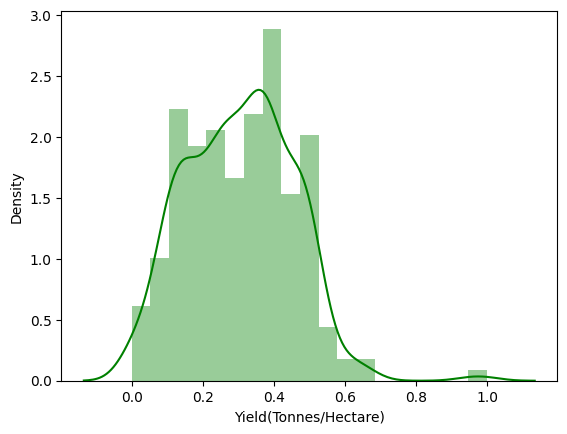

In [13]:
sns.distplot(df['Yield(Tonnes/Hectare)'],color='green')

In [14]:
df['Yield(Tonnes/Hectare)']

2      0.33
3      0.39
4      0.37
5      0.16
6      0.03
       ... 
772    0.09
773    0.60
774    0.67
775    0.47
776    0.50
Name: Yield(Tonnes/Hectare), Length: 434, dtype: float64

In [15]:
Q1 = df['Yield(Tonnes/Hectare)'].quantile(0.25)
Q3 = df['Yield(Tonnes/Hectare)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df['Yield_no_outliers'] = np.where((df['Yield(Tonnes/Hectare)'] < lower_bound) | (df['Yield(Tonnes/Hectare)'] > upper_bound), np.nan, df['Yield(Tonnes/Hectare)'])

num_points_after_handling_outliers = df['Yield_no_outliers'].count()
print("Number of points in the final DataFrame after handling outliers:", num_points_after_handling_outliers)

Number of points in the final DataFrame after handling outliers: 432


In [16]:
df = df.dropna(subset=['Yield_no_outliers'])
df = df.drop(columns=['Yield(Tonnes/Hectare)'])

In [17]:
df.rename(columns={'Yield_no_outliers': 'Yield(Tonnes/Hectare)'}, inplace=True)

In [18]:
df['Yield(Tonnes/Hectare)'].skew()

-0.019213607972963277

C:\Users\Kanishk Goyal\AppData\Local\Temp\ipykernel_8536\1820324139.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Yield(Tonnes/Hectare)'])


<Axes: xlabel='Yield(Tonnes/Hectare)', ylabel='Density'>

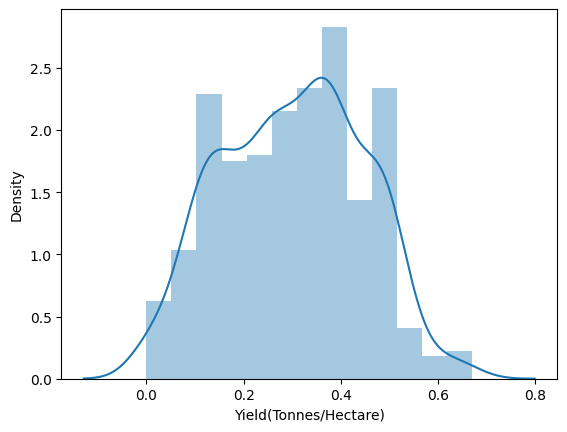

In [19]:
sns.distplot(df['Yield(Tonnes/Hectare)'])

In [20]:
df.head(10)

,stl1_7,stl1_8,stl1_9,stl1_10,stl4_7,stl4_8,stl4_9,stl4_10,swvl1_7,swvl1_8,...,rain_10,countrain_7,countrain_8,countrain_9,countrain_10,rh_7,rh_8,rh_9,rh_10,Yield(Tonnes/Hectare)
2,23.709196,24.094590,25.560040,23.412315,25.039887,24.625525,24.574990,24.610345,0.258284,0.249051,...,11.068744,5,7,6,25,76.591713,74.610118,70.154912,85.710644,0.33
3,24.294176,23.451553,24.040889,23.437735,25.239051,25.019417,24.544540,24.311922,0.229524,0.350556,...,8.904226,5,23,18,13,71.652933,81.074302,81.117259,74.728520,0.39
4,23.942125,23.527677,24.793450,23.511671,25.745236,25.181311,24.911198,24.685728,0.280500,0.295511,...,5.788409,7,10,13,10,76.606217,77.766316,75.658348,80.224693,0.37
5,25.314220,24.343950,26.299711,24.677754,26.474396,26.041270,25.756197,25.817894,0.200968,0.248262,...,5.374678,4,6,6,15,70.839536,73.404560,66.350382,75.726766,0.16
6,23.478519,23.737516,24.494094,23.601106,26.750727,25.936543,25.301642,25.051874,0.332141,0.323012,...,8.770233,11,7,5,16,79.651299,79.117374,72.429678,83.379458,0.03
7,23.791477,23.669602,24.257623,23.497620,25.049767,24.604046,24.427334,24.307016,0.295839,0.269590,...,4.658655,12,9,9,10,77.156044,74.118138,77.603097,79.497822,0.21
8,24.338915,24.233177,24.335711,23.816728,26.044777,25.498543,25.143385,24.926316,0.285036,0.286678,...,14.515860,14,17,11,27,76.341629,73.881485,74.712601,84.665413,0.29
9,24.191867,24.324287,24.542716,24.129131,25.375334,25.047292,24.908446,24.750231,0.244806,0.227082,...,5.273883,8,7,12,9,73.513614,73.452042,78.054531,80.143599,0.23
10,23.601935,23.343523,23.624950,23.596280,25.897060,25.142666,24.650859,24.383552,0.328787,0.342526,...,6.849870,9,9,8,14,80.373647,80.077706,80.962934,80.043151,0.28
11,23.951956,23.321796,23.749059,23.608477,24.927123,24.523326,24.215259,24.142796,0.316316,0.352766,...,5.740240,12,14,8,18,77.062846,80.778695,76.177106,79.786564,0.38


In [21]:
df.shape

(432, 57)

In [22]:
# cat_cols = ['DistrictName', 'year']
# # Label encode categorical columns
# encoder = LabelEncoder()
# df[cat_cols] = df[cat_cols].apply(encoder.fit_transform)

In [23]:
df.head()

,stl1_7,stl1_8,stl1_9,stl1_10,stl4_7,stl4_8,stl4_9,stl4_10,swvl1_7,swvl1_8,...,rain_10,countrain_7,countrain_8,countrain_9,countrain_10,rh_7,rh_8,rh_9,rh_10,Yield(Tonnes/Hectare)
2,23.709196,24.094590,25.560040,23.412315,25.039887,24.625525,24.574990,24.610345,0.258284,0.249051,...,11.068744,5,7,6,25,76.591713,74.610118,70.154912,85.710644,0.33
3,24.294176,23.451553,24.040889,23.437735,25.239051,25.019417,24.544540,24.311922,0.229524,0.350556,...,8.904226,5,23,18,13,71.652933,81.074302,81.117259,74.728520,0.39
4,23.942125,23.527677,24.793450,23.511671,25.745236,25.181311,24.911198,24.685728,0.280500,0.295511,...,5.788409,7,10,13,10,76.606217,77.766316,75.658348,80.224693,0.37
5,25.314220,24.343950,26.299711,24.677754,26.474396,26.041270,25.756197,25.817894,0.200968,0.248262,...,5.374678,4,6,6,15,70.839536,73.404560,66.350382,75.726766,0.16
6,23.478519,23.737516,24.494094,23.601106,26.750727,25.936543,25.301642,25.051874,0.332141,0.323012,...,8.770233,11,7,5,16,79.651299,79.117374,72.429678,83.379458,0.03


In [24]:
df.shape

(432, 57)

In [25]:
df.columns

Index(['stl1_7', 'stl1_8', 'stl1_9', 'stl1_10', 'stl4_7', 'stl4_8', 'stl4_9',
       'stl4_10', 'swvl1_7', 'swvl1_8', 'swvl1_9', 'swvl1_10', 'swvl2_7',
       'swvl2_8', 'swvl2_9', 'swvl2_10', 'swvl3_7', 'swvl3_8', 'swvl3_9',
       'swvl3_10', 'swvl4_7', 'swvl4_8', 'swvl4_9', 'swvl4_10', 'ssr_7',
       'ssr_8', 'ssr_9', 'ssr_10', 'u10_7', 'u10_8', 'u10_9', 'u10_10',
       'v10_7', 'v10_8', 'v10_9', 'v10_10', 'tmax_7', 'tmax_8', 'tmax_9',
       'tmax_10', 'tmin_7', 'tmin_8', 'tmin_9', 'tmin_10', 'rain_7', 'rain_8',
       'rain_9', 'rain_10', 'countrain_7', 'countrain_8', 'countrain_9',
       'countrain_10', 'rh_7', 'rh_8', 'rh_9', 'rh_10',
       'Yield(Tonnes/Hectare)'],
      dtype='object')

In [26]:
#df = df[['countrain_11', 'countrain_12', 'countrain_1','countrain_2', 'countrain_3', 'countrain_4', 'rain_11', 'rain_12','rain_1', 'rain_2', 'rain_3', 'rain_4','tmax_11', 'tmax_12', 'tmax_1','tmax_2', 'tmax_3', 'tmax_4', 'tmin_11', 'tmin_12', 'tmin_1', 'tmin_2','tmin_3', 'tmin_4','Yield(Tonnes/Hectare)']]

In [27]:
#df = df.drop(columns=['countrain_11', 'countrain_12', 'countrain_1','countrain_2', 'countrain_3', 'countrain_4', 'rain_11', 'rain_12','rain_1', 'rain_2', 'rain_3', 'rain_4','tmax_11', 'tmax_12', 'tmax_1','tmax_2', 'tmax_3', 'tmax_4', 'tmin_11', 'tmin_12', 'tmin_1', 'tmin_2','tmin_3', 'tmin_4'])

In [28]:
df.shape

(432, 57)

In [29]:
X = df.drop('Yield(Tonnes/Hectare)', axis=1)  # Features
y = df['Yield(Tonnes/Hectare)']  # Target variable

# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# X = X.drop(columns=['stl2','stl3'],axis=1)

In [31]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold




# Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "XGB Regressor": xgb.XGBRegressor(objective='reg:squarederror', random_state=42),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR()
}

# Train and evaluate each model
for name, model in models.items():

    mse_scores_test = []
    mse_scores_train = []
    r2_scores_test = []
    r2_scores_train = []
    # Create KFold object
    k = 10
    kfold = KFold(n_splits=k, shuffle=True)

    for train_index, test_index in kfold.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        y_pred_test = model.predict(X_test)
        y_pred_train = model.predict(X_train)
        mse_test = mean_squared_error(y_test, y_pred_test)
        mse_train = mean_squared_error(y_train, y_pred_train)
        r2_test = r2_score(y_test, y_pred_test)
        r2_train = r2_score(y_train, y_pred_train)
        mse_scores_test.append(mse_test)
        mse_scores_train.append(mse_train)
        r2_scores_test.append(r2_test)
        r2_scores_train.append(r2_train)

    average_mse_test = np.mean(mse_scores_test)
    average_mse_train = np.mean(mse_scores_train)
    average_r2_test = np.mean(r2_scores_test)
    average_r2_train = np.mean(r2_scores_train)  

    print(f'{name} - R^2 Score (Train) : {average_r2_train:.2f}, R^2 Score (Test): {average_r2_test:.2f}')
    print(r2_scores_test)


Linear Regression - R^2 Score (Train) : 0.35, R^2 Score (Test): 0.06
[0.09309621176327654, 0.02202526825632889, -0.08555017897361794, 0.04126537179658152, -0.16208005966347283, 0.26886465352873856, -0.0015928440340102767, 0.34323689324075857, 0.11265945307118475, -0.018333380303177327]
Ridge Regression - R^2 Score (Train) : 0.31, R^2 Score (Test): 0.08
[-0.249582193199549, -0.05121251513676994, 0.28263148002248273, 0.08189060960334948, 0.08321405204580312, 0.047688171465232077, 0.3925602388003754, 0.1347222661729912, 0.1908148447511746, -0.08265275300701491]
XGB Regressor - R^2 Score (Train) : 1.00, R^2 Score (Test): 0.14
[0.22625535211504333, 0.009704106413525149, -0.008657697521993857, 0.2497228950421243, 0.18598607434708936, 0.32189458234670987, 0.09902012057228604, 0.14652051518480724, 0.02461676796878509, 0.19440233996813205]
Lasso Regression - R^2 Score (Train) : 0.05, R^2 Score (Test): -0.01
[0.09621769723081675, 0.07934780699365884, 0.010171124086269967, -0.0354341469029853, -0

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
# import pandas as pd

# # Assuming X_train is your DataFrame
# # X_train = pd.DataFrame(...)

# corr_matrix = X_train.corr()

# # Get the column names of the DataFrame
# columns = corr_matrix.columns

# # Create an empty list to keep track of columns to drop
# columns_to_drop = []
# # Create a dictionary to store highly correlated features
# highly_correlated_features = {}

# # Loop over the columns
# for i in range(len(columns)):
#     for j in range(0, len(columns)):  # Loop only over the upper triangle to avoid duplicate comparisons
#         # Access the cell of the DataFrame
#         if abs(corr_matrix.iloc[i, j]) > 0.90:
#             # Sort correlated features based on correlation coefficient
#             sorted_features = sorted([(corr_matrix.iloc[i, j], columns[j]), (corr_matrix.iloc[i, i], columns[i])],
#                                      key=lambda x: abs(x[0]), reverse=True)
#             # Add the column to drop
#             columns_to_drop.append(sorted_features[1][1])  # Add the one with lower correlation
#             # Update the dictionary with highly correlated features
#             if sorted_features[0][1] in highly_correlated_features:
#                 highly_correlated_features[sorted_features[0][1]].append(sorted_features[1][1])
#             else:
#                 highly_correlated_features[sorted_features[0][1]] = [sorted_features[1][1]]

# print(len(columns_to_drop))


In [34]:
# import seaborn as sns

# corr_matrix = X_train.corr()

# # Get the column names of the DataFrame
# columns = corr_matrix.columns

# # Define a function to sort correlations in descending order (absolute value)
# def sort_correlations(series):
#   # Take the absolute value of the series
#   abs_series = series.abs()
#   # Sort the absolute values in descending order
#   return abs_series.sort_values(ascending=False)

# # Sort each column of the correlation matrix
# sorted_corr_matrix = corr_matrix.apply(sort_correlations)

# # Create an empty list to keep track of columns to drop
# columns_to_drop = []
# # Create a dictionary to store highly correlated features
# highly_correlated_features = {}

# # Loop over the sorted correlation matrix
# for i in range(len(sorted_corr_matrix.columns)):
#   # Skip the diagonal (correlation with self)
#   if i == sorted_corr_matrix.columns[i]:
#     continue
#   # Get the current column and sorted correlations
#   current_column = sorted_corr_matrix.columns[i]
#   sorted_correlations = sorted_corr_matrix.loc[current_column]
  
#   # Identify highly correlated features (> 0.90) excluding the current column
#   highly_correlated_features[current_column] = list(sorted_correlations[sorted_correlations > 0.90].index.difference([current_column]))

#   # Update columns to drop based on correlations with the current column
#   columns_to_drop.extend(highly_correlated_features[current_column])

# # Remove duplicates from columns to drop
# columns_to_drop = list(set(columns_to_drop))

# print(len(columns_to_drop))

In [35]:
import seaborn as sns
corr_matrix = X_train.corr()

# Get the column names of the DataFrame
columns = corr_matrix.columns

# Create an empty list to keep track of columns to drop
columns_to_drop = []
# Create a dictionary to store highly correlated features
highly_correlated_features = {}

# Loop over the columns
for i in range(len(columns)):
    for j in range(0, len(columns)):
        # Access the cell of the DataFrame
        if i != j and corr_matrix.iloc[i, j] > 0.90:
            # Add the column to drop
            columns_to_drop.append(columns[j])
            # Update the dictionary with highly correlated features
            if columns[i] in highly_correlated_features:
                highly_correlated_features[columns[i]].append((columns[j], corr_matrix.iloc[i, j].round(4)))
            else:
                highly_correlated_features[columns[i]] = [(columns[j], corr_matrix.iloc[i, j].round(4))]


print(len(columns_to_drop))

76


In [36]:
print(columns_to_drop)

['stl1_8', 'stl4_8', 'stl4_9', 'stl4_10', 'stl1_7', 'stl1_9', 'stl4_7', 'stl4_8', 'stl4_9', 'stl4_10', 'stl1_8', 'stl4_9', 'stl4_10', 'stl1_8', 'stl4_8', 'stl4_9', 'stl4_10', 'stl1_7', 'stl1_8', 'stl4_7', 'stl4_9', 'stl4_10', 'stl1_7', 'stl1_8', 'stl1_9', 'stl4_7', 'stl4_8', 'stl4_10', 'stl1_7', 'stl1_8', 'stl1_9', 'stl4_7', 'stl4_8', 'stl4_9', 'swvl2_7', 'swvl2_8', 'swvl2_9', 'swvl1_7', 'swvl3_7', 'swvl3_8', 'swvl1_8', 'swvl3_8', 'swvl3_9', 'swvl1_9', 'swvl3_9', 'swvl3_10', 'swvl2_7', 'swvl3_8', 'swvl2_7', 'swvl2_8', 'swvl3_7', 'swvl3_9', 'swvl2_8', 'swvl2_9', 'swvl3_8', 'swvl2_9', 'swvl4_8', 'swvl4_9', 'swvl4_10', 'swvl4_7', 'swvl4_9', 'swvl4_10', 'swvl4_7', 'swvl4_8', 'swvl4_10', 'swvl4_7', 'swvl4_8', 'swvl4_9', 'tmax_8', 'tmax_7', 'tmin_8', 'tmin_9', 'tmin_7', 'tmin_9', 'tmin_7', 'tmin_8']


In [37]:
print("Highly correlated features:")
for key, value in highly_correlated_features.items():
    print(key, ":", value)

Highly correlated features:
stl1_7 : [('stl1_8', 0.9216), ('stl4_8', 0.9142), ('stl4_9', 0.9336), ('stl4_10', 0.938)]
stl1_8 : [('stl1_7', 0.9216), ('stl1_9', 0.9143), ('stl4_7', 0.9029), ('stl4_8', 0.9356), ('stl4_9', 0.9587), ('stl4_10', 0.9601)]
stl1_9 : [('stl1_8', 0.9143), ('stl4_9', 0.9044), ('stl4_10', 0.9355)]
stl4_7 : [('stl1_8', 0.9029), ('stl4_8', 0.9933), ('stl4_9', 0.981), ('stl4_10', 0.9692)]
stl4_8 : [('stl1_7', 0.9142), ('stl1_8', 0.9356), ('stl4_7', 0.9933), ('stl4_9', 0.9958), ('stl4_10', 0.9876)]
stl4_9 : [('stl1_7', 0.9336), ('stl1_8', 0.9587), ('stl1_9', 0.9044), ('stl4_7', 0.981), ('stl4_8', 0.9958), ('stl4_10', 0.9952)]
stl4_10 : [('stl1_7', 0.938), ('stl1_8', 0.9601), ('stl1_9', 0.9355), ('stl4_7', 0.9692), ('stl4_8', 0.9876), ('stl4_9', 0.9952)]
swvl1_7 : [('swvl2_7', 0.9457)]
swvl1_8 : [('swvl2_8', 0.9507)]
swvl1_9 : [('swvl2_9', 0.9662)]
swvl2_7 : [('swvl1_7', 0.9457), ('swvl3_7', 0.9241), ('swvl3_8', 0.9435)]
swvl2_8 : [('swvl1_8', 0.9507), ('swvl3_8', 0.933

In [38]:
stop

NameError: name 'stop' is not defined

In [ ]:
import time
def print_accuracy(f):
    print(
        f"Root mean squared test error = {np.sqrt(np.mean((f(X_test) - y_test) ** 2))}"
    )
    time.sleep(0.5)  # to let the print get out before any progress bars

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rforest = RandomForestRegressor(
    n_estimators=1000, max_depth=None, min_samples_split=2, random_state=0
)
rforest.fit(X_train, y_train)
print_accuracy(rforest.predict)

In [ ]:
y_pred = rforest.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(mse,r2)

In [ ]:
#pip install shap

In [ ]:
stop

In [ ]:
columns_to_drop = set(columns_to_drop)
print(columns_to_drop)

In [ ]:
len(columns_to_drop)

In [ ]:
X_train.drop(columns = columns_to_drop, axis = 1, inplace=True)
X_test.drop(columns = columns_to_drop, axis = 1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold


# Create KFold object
k = 5
kfold = KFold(n_splits=k, shuffle=True)


# Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Support Vector Machine": SVR()
}

# Train and evaluate each model
for name, model in models.items():
    mse_scores = []
    r2_scores = []

    for train_index, test_index in kfold.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'{name} - Mean Squared Error: {mse:.2f}, R^2 Score: {r2:.2f}')


In [ ]:
import xarray
data = xarray.open_dataset(r"C:\Users\Kanishk Goyal\OneDrive - IIT Kanpur\Desktop\Prof. Hamim Zafar\Data\Relative humidity\1month_mean_Global_ea_r2_199703_v02.grib", engine='cfgrib')
data.to_netcdf(r"C:\Users\Kanishk Goyal\OneDrive - IIT Kanpur\Desktop\Prof. Hamim Zafar\Data\Relative humidity\1month_mean_Global_ea_r2_199703_v02.nc")